In [1]:
!pip install --upgrade scikit-learn

^C


In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import random
import seaborn as sns

In [3]:
from matplotlib.lines import Line2D 

def generateRandomRGB(n):
    colors = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), 
               random.uniform(0.0, 1.0)) for i in range(n)]
    return colors

def plotData(X, y, colors=None, markers=None, title=''):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    if(colors is None):
        colors = generateRandomRGB(n_classes)
    if(markers is None):
        markers = list(Line2D.markers.keys())
        
    for class_index in range(n_classes):
        plt.scatter(X[y == unique_classes[class_index],0], X[y == unique_classes[class_index],1], 
                    label=unique_classes[class_index], c=colors[class_index],
                    marker=markers[class_index])
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [4]:
pokemon_train = pd.read_csv("Pokemon_train.csv")
pokemon_test = pd.read_csv("Pokemon_test.csv")

In [5]:
pokemon_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,...,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,...,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,...,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,...,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy


In [6]:
pokemon_train["type1"].value_counts()

fairy       83
rock        77
bug         76
electric    76
dragon      76
ghost       75
fire        74
grass       74
water       74
steel       73
poison      72
dark        72
ground      71
ice         71
fighting    70
psychic     69
normal      68
Name: type1, dtype: int64

In [7]:
pokemon_train.isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
dtype: int64

In [8]:
X_train, y_train = pokemon_train.iloc[:, :-1], pokemon_train.iloc[:, -1]
X_test, y_test = pokemon_test.iloc[:, :-1], pokemon_test.iloc[:, -1]

## Apply Gaussian Naive Bayes Baseline Model

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [10]:
baseline_gnb_clf = GaussianNB()
baseline_gnb_clf.fit(X_train, y_train)

GaussianNB()

In [11]:
baseline_gnb_preds = baseline_gnb_clf.predict(X_test)
baseline_gnb_accuracy = accuracy_score(y_test, baseline_gnb_preds)
print("Gaussian NB Accuracy = {:.2f}%".format(baseline_gnb_accuracy))

Gaussian NB Accuracy = 0.51%


## Apply SVM Baseline Model

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
baseline_svc_clf = SVC(probability=True, gamma='auto')
baseline_svc_clf.fit(X_train, y_train)
baseline_svc_preds = baseline_svc_clf.predict(X_test)
baseline_svc_acc = accuracy_score(baseline_svc_preds, y_test)
print(baseline_svc_acc)

0.18210862619808307


In [32]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

svm_grid = GridSearchCV(SVC(), param_grid, verbose=1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
             verbose=1)

In [33]:
svm_preds = svm_grid.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy = {:.2f}%".format(svm_accuracy))

SVM Accuracy = 0.73%


# Apply T-SNE to Visualize the Data

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_train)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

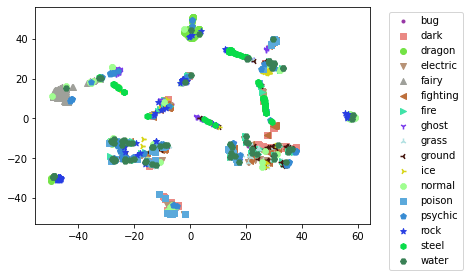

In [16]:
colors = generateRandomRGB(len(y_train.unique()))
plotData(X_train_reduced, y_train, colors)

# Apply KMeans

In [17]:
from sklearn.cluster import KMeans

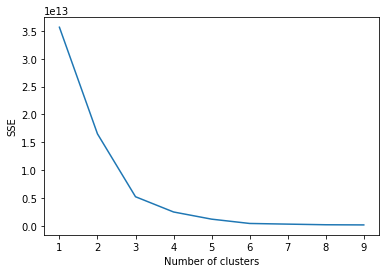

In [18]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X_train)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
X_train_kmeans = X_train.copy()
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0).fit(X_train)
X_train_kmeans["centroid"] = kmeans.fit_predict(X_train)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


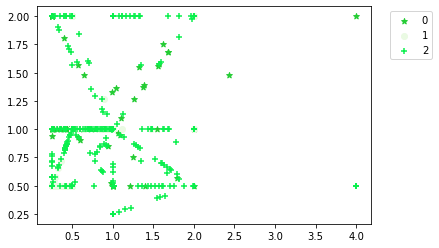

In [20]:
# Visualize the TSNE reduced features with kmeans
plotData(X_train.to_numpy(), X_train_kmeans["centroid"], markers=["*", 'o', '+'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


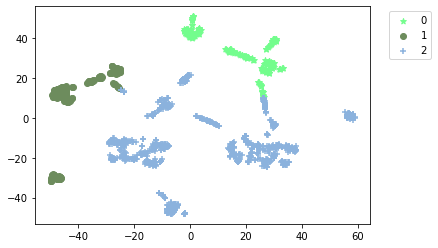

In [21]:
# Plot the first 2 features of X_train with their clusters
plotData(X_train_reduced, X_train_kmeans["centroid"], markers=["*", 'o', '+'])

# Tuning PCA n_components with Baseline Models

In [22]:
from sklearn.decomposition import PCA

In [23]:
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        pca = PCA(n_components=i, random_state=0)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, pca_accs, clf_name, operation='PCA', xlabel='n_components'):
    plt.plot(pca_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot([baseline_acc]*len(pca_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

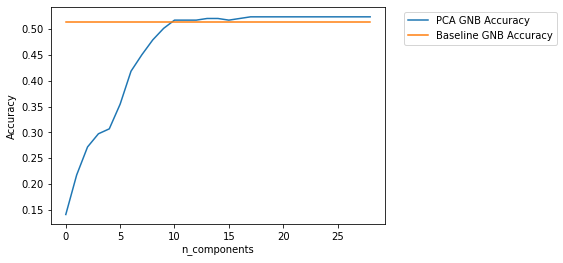

In [24]:
accs = tune_pca(GaussianNB(), X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_gnb_accuracy, accs, "GNB")

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with featu

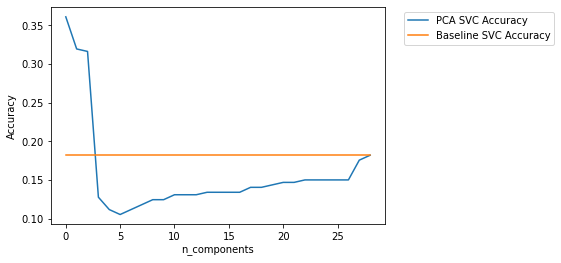

In [25]:
accs = tune_pca(baseline_svc_clf, X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_svc_acc, accs, "SVC")

According to both plots, 10 is the best number of components.

In [26]:
pca = PCA(n_components=10, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature Selection by Filtering

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

In [28]:
def select_features(X_train, y_train, X_test, y_test, clf, fs):
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    X_test_best_features = fs.transform(X_test) 
    clf.fit(X_train_best_features, y_train)
    y_pred = clf.predict(X_test_best_features)
    acc = accuracy_score(y_test, y_pred)
    return acc

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature n

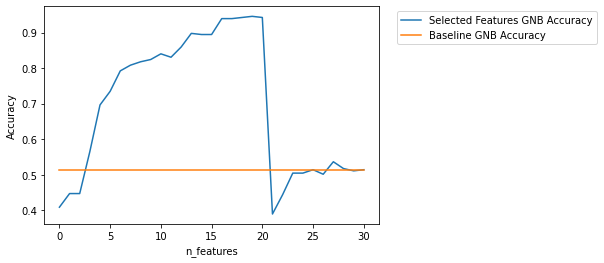

In [72]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with featu

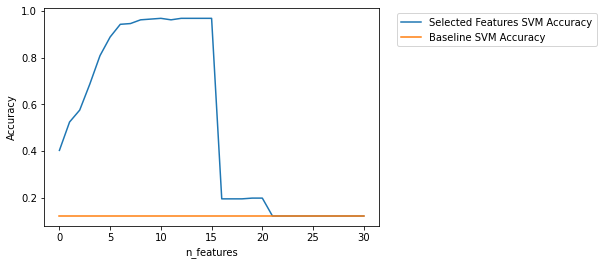

In [73]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_svc_clf, fs)
    accs.append(acc)
visualize_accs(baseline_svc_acc, accs, "SVM", operation='Selected Features', xlabel='n_features')

# Feature Selection by Wrapping

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector

n_features = 2


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 3


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 4


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 5


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 6


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 7


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 8


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 9


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 10


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 11


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 12


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 13


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 14


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 15


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 16


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 17


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 18


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 19


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 20


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 21


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 22


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 23


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 24


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 25


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 26


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 27


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 28


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 29


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 30


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 31


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


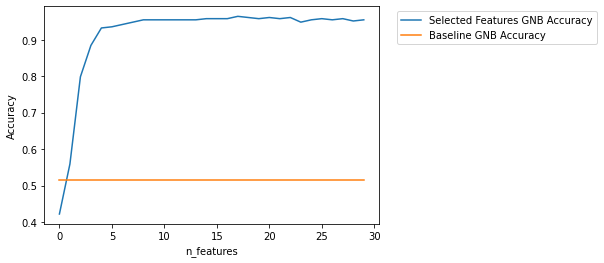

In [75]:
accs = []
for n in range(2,32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(baseline_gnb_clf, n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)

gnb_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

With less than 10 features, Gaussian NB is achieving more than 90% accuracy. This accuracy remains high until 31 features, meaning that there was only one specific (the 32nd feature) that has been driving the accuracy down. This feature is experience_growth as shown below.

In [77]:
clf = GaussianNB()

fs = SequentialFeatureSelector(clf, n_features_to_select=31)
fs.fit(X_train, y_train)

good_features = X_train.columns[fs.get_support()]
set(X_train.columns) - set(good_features)

{'experience_growth'}

In [ ]:
accs = []
for n in range(2, 32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(baseline_svc_clf, n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_svc_clf, fs)
    accs.append(acc)

svm_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(baseline_svc_acc, accs, "SVM", operation='Selected Features', xlabel='n_features')


# From  Wrapping Methods we will choose  10 features 

In [66]:
clf = GaussianNB()

fs = SequentialFeatureSelector(clf, n_features_to_select=10)
fs.fit(X_train, y_train)
X_train_best_features = fs.transform(X_train)
X_test_best_features = fs.transform(X_test) 
clf.fit(X_train_best_features, y_train)
y_pred = clf.predict(X_test_best_features)
print(accuracy_score(y_test, y_pred))

0.9552715654952076


In [ ]:
for n in range(1, 10):
   
    

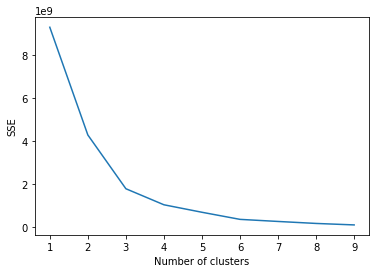

In [33]:
sse = []
fs = SequentialFeatureSelector(baseline_gnb_clf, n_features_to_select=6)
fs.fit(X_train, y_train)
X_train_best_features = fs.transform(X_train)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit( X_train_best_features)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

sse = []
for k in range(1, 10):
    KM= KMeans(n_clusters=k, max_iter=1000, random_state=0)
    fs = SequentialFeatureSelector(KM, n_features_to_select=15)
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    
    kmeans = KM.fit( X_train_best_features)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# SOM algorithm with   Wrapping Methods

In [35]:
from sklearn_som.som import SOM

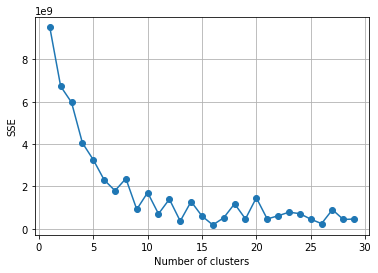

In [67]:
sse = []
fs = SequentialFeatureSelector(baseline_gnb_clf, n_features_to_select=10)
fs.fit(X_train, y_train)
X_train_best_features = fs.transform(X_train)
for k in range(1, 30):
    
    SOM_model= SOM(m=k, n=1, dim= X_train_best_features.shape[1],max_iter=3000)
    labels=SOM_model.fit_predict( X_train_best_features)
    sse.append(SOM_model.inertia_)
plt.figure()
plt.plot(range(1, 30), sse, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.grid(True)

In [129]:
model= SOM(m=10, n=1, dim= X_train_best_features.shape[1],max_iter=3000)
initial_Neuron_positions=pd.DataFrame(model.weights)
model.fit_predict( X_train_best_features)
final_Neuron_positions =pd.DataFrame(SOM_model.weights)

In [130]:
print(initial_Neuron_positions)   
print("****************************\n",final_Neuron_positions)

          0         1         2         3         4         5         6  \
0  1.833630  0.688963  0.576617  0.985862  1.616118  0.625073  0.984441   
1  1.529643  1.562597  0.684875  0.857389  1.067327  0.841864  0.826307   
2  1.331722  1.792513  0.758424  0.797748  0.949803  0.990773  0.715672   
3  1.177741  1.382023  0.883490  0.826212  1.075405  1.180339  0.601257   
4  1.196557  1.007242  1.071704  0.978542  1.193680  1.155226  0.611098   
5  1.028829  1.035197  1.189047  1.077010  1.120353  1.055761  0.838040   
6  0.972816  1.012540  1.209620  1.166898  1.089257  0.917985  0.957907   
7  1.009961  1.060829  1.210324  1.231580  1.022287  0.941798  0.959688   
8  1.071304  1.053243  1.214644  1.275174  0.861228  0.865056  0.941607   
9  1.026228  0.767699  1.123258  1.145698  0.933001  0.825474  0.964277   

          7             8           9  
0  0.667288  21612.766150  116.589429  
1  0.994743  11715.978602   73.265548  
2  1.149353   9373.028236   62.091215  
3  1.400603   

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, whi

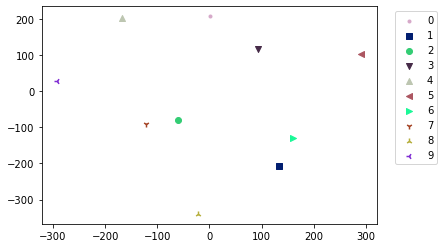

In [139]:

tsne = TSNE(n_components=3, random_state=0)
X_train_reduced = tsne.fit_transform(initial_Neuron_positions)
initial_Neuron_positions["Neuron_num"] = list(range(0,model.dim))
plotData(np.array(X_train_reduced),initial_Neuron_positions["Neuron_num"])

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, whi

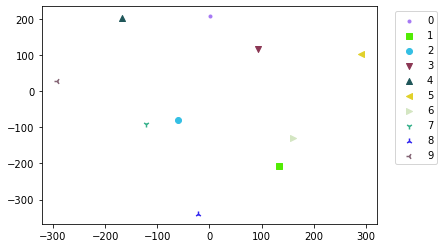

In [138]:
tsne = TSNE(n_components=3, random_state=0)
X_train_reduce = tsne.fit_transform(final_Neuron_positions)
final_Neuron_positions["Neuron_num"] = list(range(0,model.dim))
plotData(np.array(X_train_reduce),final_Neuron_positions["Neuron_num"])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# BSCAN

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
eps_list=[]
min_samples_list=[]
n_clusters_=[]
for i in range(2,15,1):#2-15
    for j in np.arange(0.2,3,0.01): #(0.2-3
        model=DBSCAN(eps=j, min_samples=i)
        model.fit(X_train)
        min_samples_list.append(i)
        eps_list.append(j)
        n_clusters_.append(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0))#remove outlier class (-1)

In [111]:
eps=[]
min_sample=[]
for i in range(len(n_clusters_)):
 
  if  n_clusters_[i]==9 :
    eps.append(eps_list[i])
    min_sample.append(min_samples_list[i])
    print("min_samples = ",min_samples_list[i])
    print("eps = ",eps_list[i],"\n_________")


min_samples =  2
eps =  1.1500000000000008 
_________
min_samples =  2
eps =  1.1600000000000008 
_________
min_samples =  2
eps =  1.1700000000000008 
_________
min_samples =  2
eps =  1.1800000000000008 
_________
min_samples =  2
eps =  1.1900000000000008 
_________
min_samples =  2
eps =  1.2000000000000008 
_________
min_samples =  2
eps =  1.2100000000000009 
_________
min_samples =  2
eps =  1.2200000000000009 
_________
min_samples =  2
eps =  1.2300000000000009 
_________
min_samples =  2
eps =  1.2400000000000009 
_________
min_samples =  2
eps =  1.2500000000000009 
_________
min_samples =  2
eps =  1.260000000000001 
_________
min_samples =  2
eps =  1.270000000000001 
_________
min_samples =  2
eps =  1.280000000000001 
_________
min_samples =  2
eps =  1.290000000000001 
_________
min_samples =  2
eps =  1.300000000000001 
_________
min_samples =  2
eps =  1.310000000000001 
_________
min_samples =  2
eps =  1.320000000000001 
_________
min_samples =  2
eps =  1.330000000

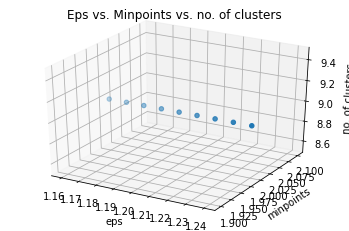

In [113]:
fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.scatter3D(eps[1:10],min_sample[1:10] , 9, 'Green')

ax.set_title("Eps vs. Minpoints vs. no. of clusters")

ax.set_xlabel("eps")

ax.set_ylabel("minpoints")

ax.set_zlabel("no. of clusters")

plt.show()
 